Load a dataset with some missing values.Try three different methods for handling missing data: Dropping rows/columns Replacing mean/median Using KNNImputer or IterativeImputer . Compare the results.

In [1]:
import seaborn as sns
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer

# Load dataset
titanic = sns.load_dataset("titanic")

print("Original missing values per column:")
print(titanic.isnull().sum())

# Dropping rows with missing data (simple)
drop_rows = titanic.dropna()
print("\nAfter dropping rows with missing values:")
print(drop_rows.isnull().sum())
print(f"Shape: {drop_rows.shape}")

# Filling missing values for numeric columns with mean
fill_mean_median = titanic.copy()
numeric_cols = fill_mean_median.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_cols:
    fill_mean_median[col].fillna(fill_mean_median[col].mean(), inplace=True)

# Filling missing values for categorical columns with mode
categorical_cols = fill_mean_median.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols:
    fill_mean_median[col].fillna(fill_mean_median[col].mode()[0], inplace=True)

print("\nAfter filling missing values with mean/mode:")
print(fill_mean_median.isnull().sum())

# KNN Imputer only on numeric columns
knn_imputer = KNNImputer(n_neighbors=5)
titanic_num = titanic[numeric_cols]

# Apply KNN imputation (only numeric columns)
titanic_num_imputed = pd.DataFrame(knn_imputer.fit_transform(titanic_num), columns=numeric_cols)

print("\nAfter KNN Imputation on numeric columns:")
print(titanic_num_imputed.isnull().sum())

# Iterative Imputer



Original missing values per column:
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

After dropping rows with missing values:
survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64
Shape: (182, 15)

After filling missing values with mean/mode:
survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

After KNN Imputation on 

/tmp/ipython-input-3300323905.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  fill_mean_median[col].fillna(fill_mean_median[col].mean(), inplace=True)
/tmp/ipython-input-3300323905.py:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(val

Apply Min-Max scaling and Standard scaling on the same dataset. Plot the distributions before and after scaling. Which scaling technique is more appropriate for features with outliers ?

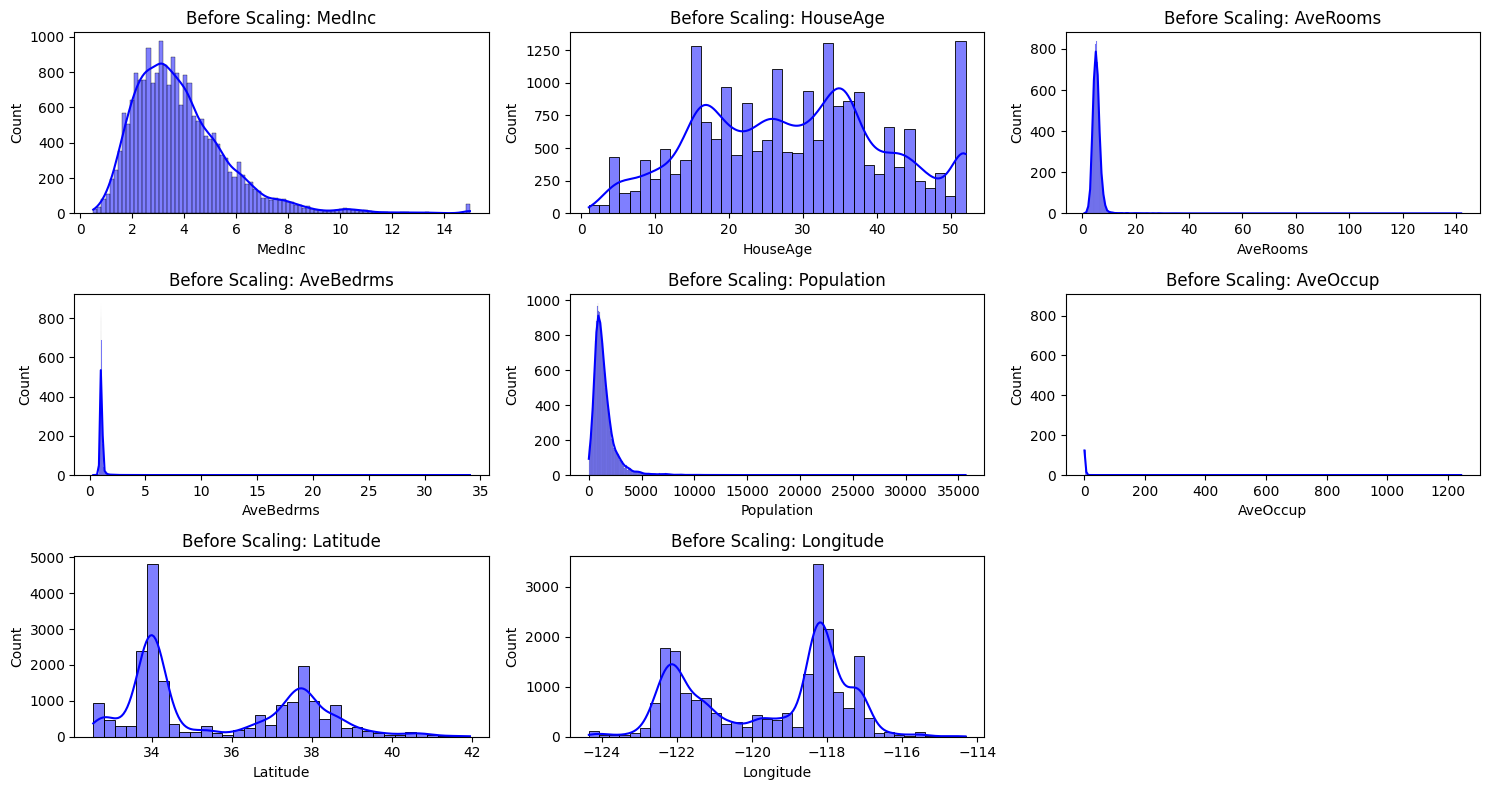

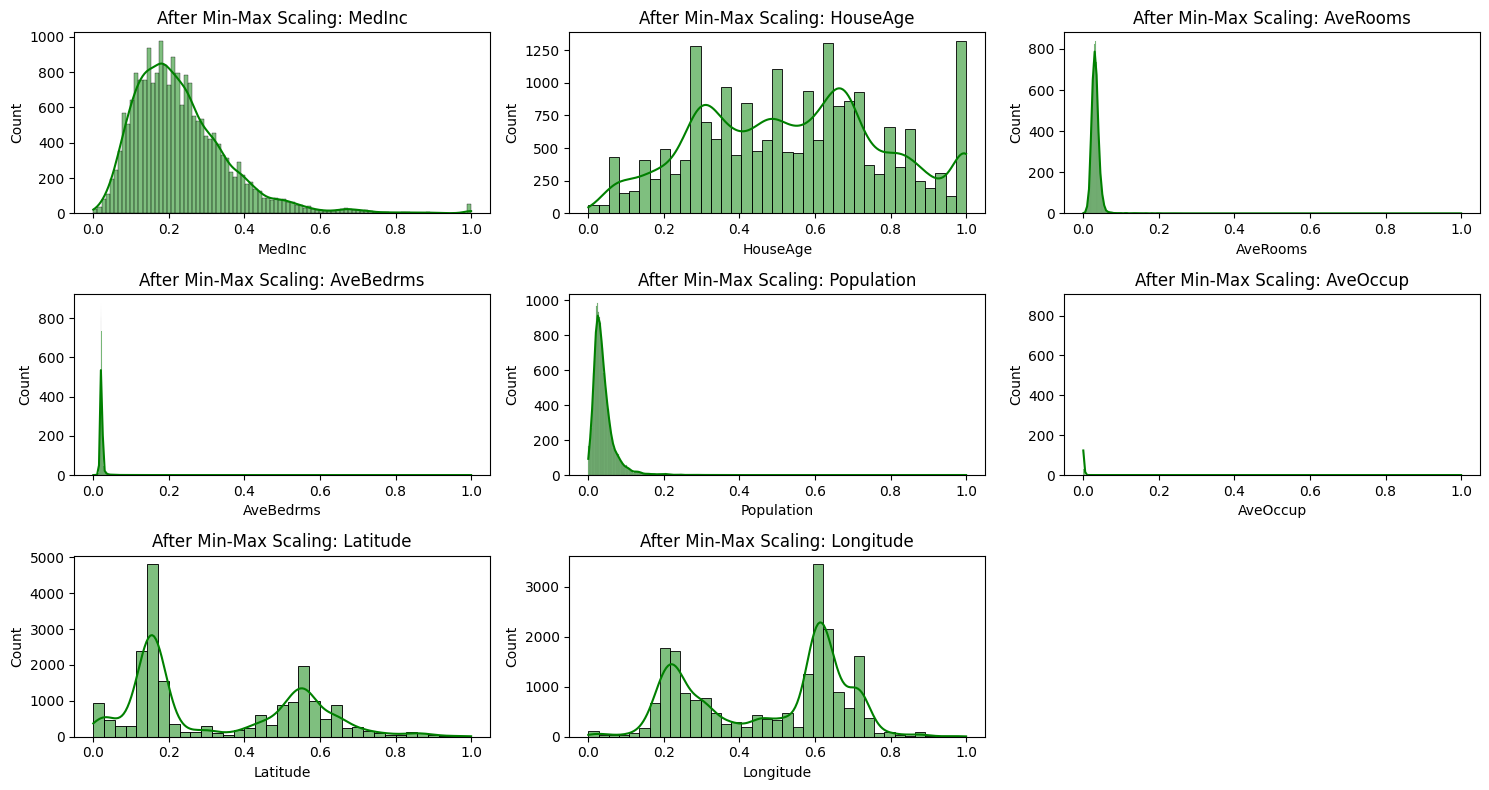

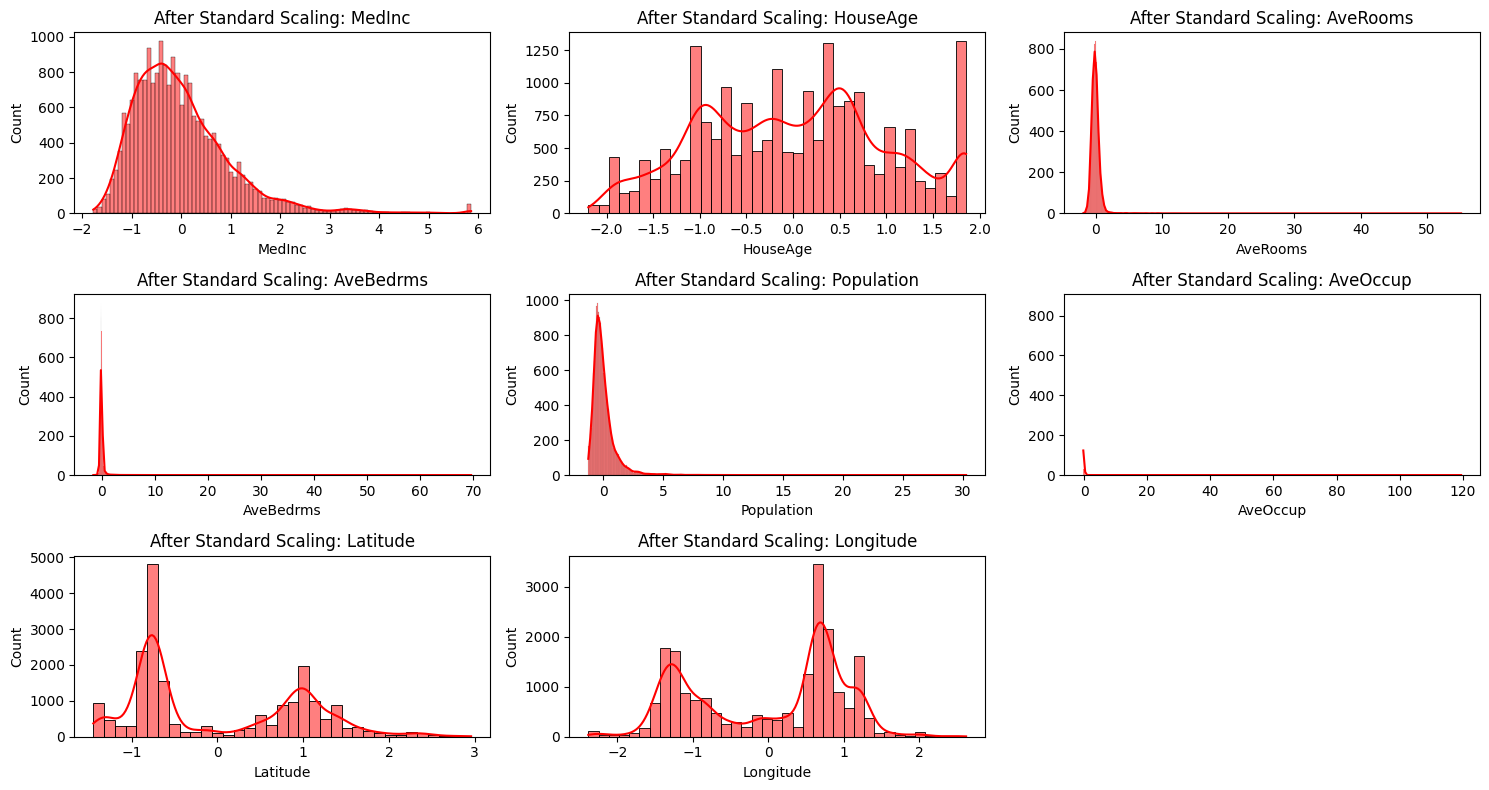

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Load dataset
data = fetch_california_housing(as_frame=True)
df = data.frame

# Features to scale
features = df.columns[:-1]  # exclude target 'MedHouseVal'

# Plot distributions before scaling
plt.figure(figsize=(15, 8))
for i, col in enumerate(features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True, color='blue')
    plt.title(f"Before Scaling: {col}")
plt.tight_layout()
plt.show()

# Apply Min-Max Scaling
minmax_scaler = MinMaxScaler()
df_minmax = df.copy()
df_minmax[features] = minmax_scaler.fit_transform(df[features])

# Plot distributions after Min-Max Scaling
plt.figure(figsize=(15, 8))
for i, col in enumerate(features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df_minmax[col], kde=True, color='green')
    plt.title(f"After Min-Max Scaling: {col}")
plt.tight_layout()
plt.show()

# Apply Standard Scaling
standard_scaler = StandardScaler()
df_standard = df.copy()
df_standard[features] = standard_scaler.fit_transform(df[features])

# Plot distributions after Standard Scaling
plt.figure(figsize=(15, 8))
for i, col in enumerate(features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df_standard[col], kde=True, color='red')
    plt.title(f"After Standard Scaling: {col}")
plt.tight_layout()
plt.show()


Take a categorical feature (eg city with values Delhi , Mumbai , Chennai). Encode it using both LabelEncoder and OneHotEncoder. Discuss when each should be used.

In [ ]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import pandas as pd

# Load Titanic dataset
titanic = sns.load_dataset('titanic')

# Select "embarked" column (categorical)
cat_feature = titanic[['embarked']].dropna()  # Drop missing for simplicity

print("Original feature sample:")
print(cat_feature['embarked'].value_counts())

# 1. Label Encoding
le = LabelEncoder()
cat_feature['embarked_label_enc'] = le.fit_transform(cat_feature['embarked'])

print("\nLabel Encoded values:")
print(cat_feature[['embarked', 'embarked_label_enc']].head(10))

# 2. One-Hot Encoding (using pandas get_dummies)
one_hot = pd.get_dummies(cat_feature['embarked'], prefix='embarked')

print("\nOne-Hot Encoded dataframe sample:")
print(one_hot.head(10))


Original feature sample:
embarked
S    644
C    168
Q     77
Name: count, dtype: int64

Label Encoded values:
  embarked  embarked_label_enc
0        S                   2
1        C                   0
2        S                   2
3        S                   2
4        S                   2
5        Q                   1
6        S                   2
7        S                   2
8        S                   2
9        C                   0

One-Hot Encoded dataframe sample:
   embarked_C  embarked_Q  embarked_S
0       False       False        True
1        True       False       False
2       False       False        True
3       False       False        True
4       False       False        True
5       False        True       False
6       False       False        True
7       False       False        True
8       False       False        True
9        True       False       False


Write a function to manually normalize a feature (0-1) range. Compare its output with MinMaxScaler from sklearn.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler

# Custom normalization function (0-1 scaling)
def normalize_manual(series):
    return (series - series.min()) / (series.max() - series.min())

# Load Iris dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

print("Original data sample:")
print(df.head())

# Apply manual normalization on 'sepal length (cm)'
df['sepal length normalized manual'] = normalize_manual(df['sepal length (cm)'])

# Apply sklearn MinMaxScaler on 'sepal length (cm)'
scaler = MinMaxScaler()
df['sepal length normalized sklearn'] = scaler.fit_transform(df[['sepal length (cm)']])

print("\nComparison of normalization outputs:")
print(df[['sepal length (cm)', 'sepal length normalized manual', 'sepal length normalized sklearn']].head())


Original data sample:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

Comparison of normalization outputs:
   sepal length (cm)  sepal length normalized manual  \
0                5.1                        0.222222   
1                4.9                        0.166667   
2                4.7                        0.111111   
3                4.6                        0.083333   
4                5.0                        0.194444   

   sepal length normalized sklearn  
0                         0.222222  
1                         0.166667  
2                         0.111111  

Suppose a "salary" column has missing values. Instead of mean/median , fill them based on the "Education Level" column(hint:groupby+filna).Show the steps.

In [ ]:
import seaborn as sns
import pandas as pd

# Load dataset
titanic = sns.load_dataset("titanic")

print("Missing values before imputation:")
print(titanic['age'].isnull().sum())

# Calculate mean age by 'class'
mean_age_by_class = titanic.groupby('class')['age'].mean()
print("\nMean age by class:")
print(mean_age_by_class)

# Function to fill missing age based on 'class'
def fill_age(row):
    if pd.isnull(row['age']):
        return mean_age_by_class[row['class']]
    else:
        return row['age']

# Apply the function row-wise
titanic['age_filled'] = titanic.apply(fill_age, axis=1)

print("\nMissing values after imputation:")
print(titanic['age_filled'].isnull().sum())

# Check some samples where age was filled
print("\nSample of filled ages:")
print(titanic.loc[titanic['age'].isnull(), ['class', 'age', 'age_filled']].head())


Missing values before imputation:
177

Mean age by class:
class
First     38.233441
Second    29.877630
Third     25.140620
Name: age, dtype: float64

Missing values after imputation:
0

Sample of filled ages:
     class  age  age_filled
5    Third  NaN    25.14062
17  Second  NaN    29.87763
19   Third  NaN    25.14062
26   Third  NaN    25.14062
28   Third  NaN    25.14062


/tmp/ipython-input-3525890920.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_age_by_class = titanic.groupby('class')['age'].mean()


Implement Z-score method to detect outliers in a numeric feature. Compare it with the IQR method for the same feature.

Total samples: 20640
Outliers detected by Z-score method: 0
Outliers detected by IQR method: 1071


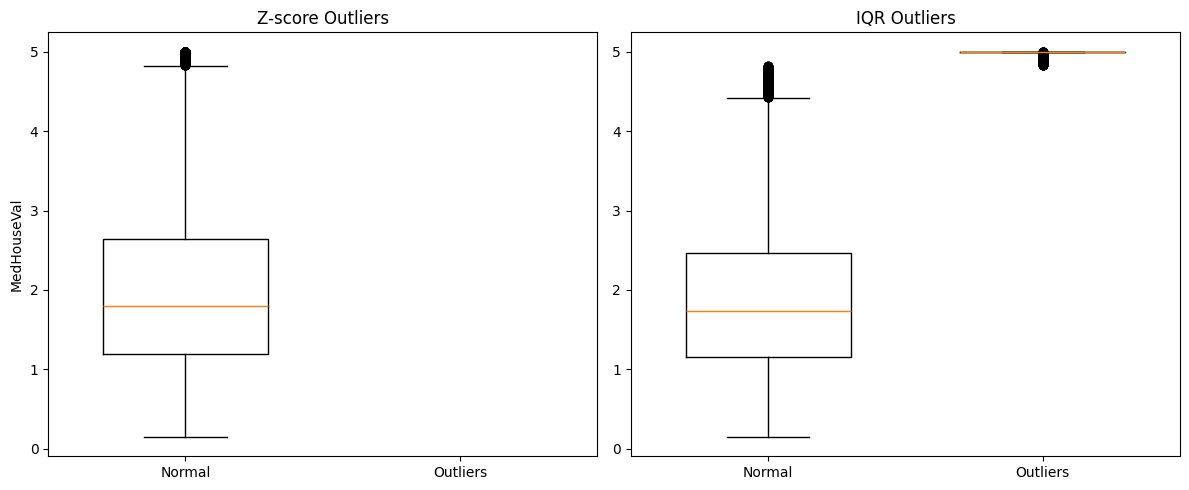

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

# Load California Housing dataset
data = fetch_california_housing(as_frame=True)
df = data.frame

# Feature to analyze
feature = 'MedHouseVal'

# Z-score method for outlier detection
mean_val = df[feature].mean()
std_val = df[feature].std()
df['z_score'] = (df[feature] - mean_val) / std_val

# Threshold for outliers (usually |z| > 3)
z_threshold = 3
df['outlier_z'] = df['z_score'].abs() > z_threshold

# IQR method for outlier detection
Q1 = df[feature].quantile(0.25)
Q3 = df[feature].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df['outlier_iqr'] = (df[feature] < lower_bound) | (df[feature] > upper_bound)

# Summary of detected outliers
print(f"Total samples: {len(df)}")
print(f"Outliers detected by Z-score method: {df['outlier_z'].sum()}")
print(f"Outliers detected by IQR method: {df['outlier_iqr'].sum()}")

# Visualize results
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.title('Z-score Outliers')
plt.boxplot(df.loc[~df['outlier_z'], feature], positions=[1], widths=0.6)
plt.boxplot(df.loc[df['outlier_z'], feature], positions=[2], widths=0.6)
plt.xticks([1, 2], ['Normal', 'Outliers'])
plt.ylabel(feature)

plt.subplot(1, 2, 2)
plt.title('IQR Outliers')
plt.boxplot(df.loc[~df['outlier_iqr'], feature], positions=[1], widths=0.6)
plt.boxplot(df.loc[df['outlier_iqr'], feature], positions=[2], widths=0.6)
plt.xticks([1, 2], ['Normal', 'Outliers'])

plt.tight_layout()
plt.show()


Create a new feature by combining two existing features in the dataset (e.g.,BMI=weight/height^2). Normalize and scale the new feature.

In [ ]:
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load Titanic dataset
titanic = sns.load_dataset('titanic')

# Create new feature: FamilySize
titanic['FamilySize'] = titanic['sibsp'] + titanic['parch'] + 1

print("Sample FamilySize values before scaling:")
print(titanic['FamilySize'].head())

# Normalize & scale FamilySize using MinMaxScaler
scaler = MinMaxScaler()
titanic['FamilySize_scaled'] = scaler.fit_transform(titanic[['FamilySize']])

print("\nSample FamilySize values after Min-Max scaling:")
print(titanic[['FamilySize', 'FamilySize_scaled']].head())


Sample FamilySize values before scaling:
0    2
1    2
2    1
3    2
4    1
Name: FamilySize, dtype: int64

Sample FamilySize values after Min-Max scaling:
   FamilySize  FamilySize_scaled
0           2                0.1
1           2                0.1
2           1                0.0
3           2                0.1
4           1                0.0
